Head of the DataFrame:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

Column names in your DataFrame: Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

Fitted parameters:
a (amplitude) = 21.7131
b (growth rate) = 0.0100

First few rows with fitted trend:
        date   meantemp  Exponential_Trend
0 2017-01-01  15.913043          21.713079
1 2017-01-02  18.500000          21.713079
2 2017-01-03  17.111111          21.713079
3 2017-01-04  18.700000          21.713079
4 2017-01-05  18.388889          21.713079


C:\Users\USER\AppData\Local\Temp\ipykernel_9392\2492548018.py:46: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_trend, x_data, y_data, p0=[1, 0.01])


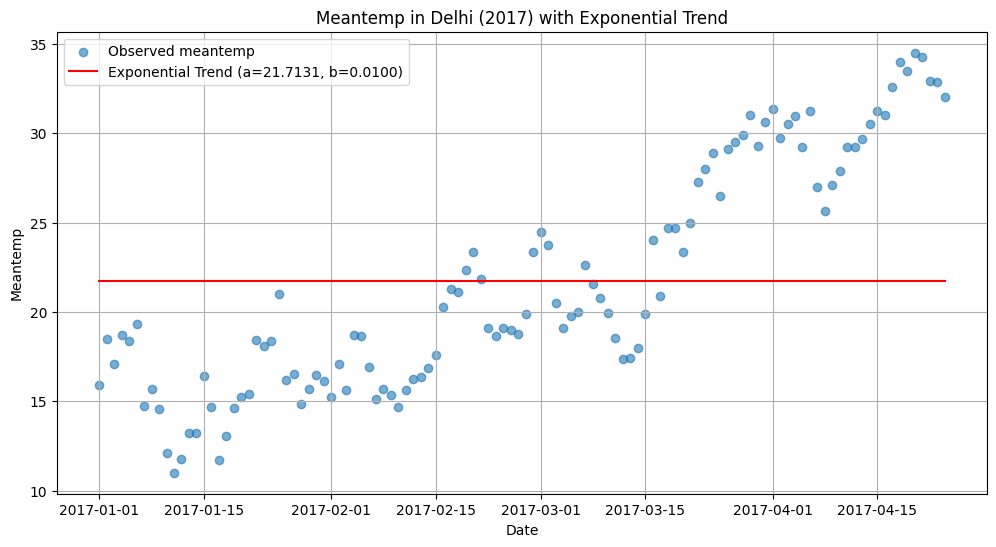

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/DailyDelhiClimateTest.csv'  # Update path
date_column = 'date'  # Column with dates
value_column = 'meantemp'  # Choose: 'meantemp', 'humidity', 'wind_speed', or 'meanpressure'
date_format = 'ISO8601'  # Since dates are in YYYY-MM-DD format

# --- Define the exponential trend function ---
def exponential_trend(x, a, b):
    return a * np.exp(b * x)

# --- Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Head of the DataFrame:")
    print(df.head())
    print("\nColumn names in your DataFrame:", df.columns)

    # Convert date to datetime (auto-detects ISO8601 format)
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    df['Year'] = df[date_column].dt.year  # Extract year for trend fitting
    df['DayOfYear'] = df[date_column].dt.dayofyear  # Optional: For seasonal analysis

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Error: Column '{e}' not found. Check column names.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# --- Fit the exponential trend model ---
if not df.empty:
    try:
        # Use 'Year' as x and selected variable (e.g., 'meantemp') as y
        x_data = df['Year'].values - df['Year'].min()  # Scale to avoid large exponents
        y_data = df[value_column].values

        # Fit the exponential curve
        popt, pcov = curve_fit(exponential_trend, x_data, y_data, p0=[1, 0.01])
        a_fitted, b_fitted = popt

        # Generate fitted trend line
        df['Exponential_Trend'] = exponential_trend(x_data, a_fitted, b_fitted)

        print("\nFitted parameters:")
        print(f"a (amplitude) = {a_fitted:.4f}")
        print(f"b (growth rate) = {b_fitted:.4f}")
        print("\nFirst few rows with fitted trend:")
        print(df[[date_column, value_column, 'Exponential_Trend']].head())

        # --- Plot the results ---
        plt.figure(figsize=(12, 6))
        plt.scatter(df[date_column], df[value_column], label=f'Observed {value_column}', alpha=0.6)
        plt.plot(df[date_column], df['Exponential_Trend'], 'r-', 
                label=f'Exponential Trend (a={a_fitted:.4f}, b={b_fitted:.4f})')
        plt.title(f'{value_column.capitalize()} in Delhi (2017) with Exponential Trend')
        plt.xlabel('Date')
        plt.ylabel(value_column.capitalize())
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error fitting trend: {e}")

else:
    print("DataFrame is empty. Check your data file.")